In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os

from glob import glob
from PIL import Image
from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
from warnings import filterwarnings

filterwarnings("ignore", category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [3]:
data_dict = {
    "file_name": [],
    "size": [],
    "width": [],
    "height": [],
    "aspect_ratio": [],
    "category": [],
}
data_dir = "../flowers"

# /flowers/{label}/{file_name}
for folder in glob(data_dir + "/*"):
    label = folder.split("/")[-1]

    for img_path in glob(f"{data_dir}/{label}/*"):
        img_name = img_path.split("/")[-1]

        img = Image.open(img_path)
        width, height = img.size

        data_dict["file_name"].append(img_path)
        data_dict["size"].append((width, height))
        data_dict["width"].append(width)
        data_dict["height"].append(height)
        data_dict['category'].append(label)
        data_dict['aspect_ratio'].append(round(width / height, 2))

In [4]:
df = pd.DataFrame.from_dict(data_dict)
df.head()

,file_name,size,width,height,aspect_ratio,category
0,../flowers/daisy/14167534527_781ceb1b7a_n.jpg,"(320, 240)",320,240,1.33,daisy
1,../flowers/daisy/34718882165_68cdc9def9_n.jpg,"(240, 159)",240,159,1.51,daisy
2,../flowers/daisy/5512287917_9f5d3f0f98_n.jpg,"(320, 242)",320,242,1.32,daisy
3,../flowers/daisy/476857510_d2b30175de_n.jpg,"(320, 240)",320,240,1.33,daisy
4,../flowers/daisy/521762040_f26f2e08dd.jpg,"(500, 375)",500,375,1.33,daisy


In [14]:
df['category'].value_counts()

dandelion    1052
tulip         984
rose          784
daisy         764
sunflower     733
Name: category, dtype: int64

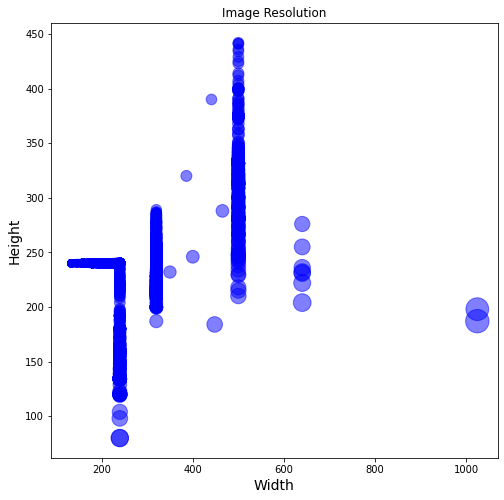

In [7]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(df['width'],
                    df['height'],
                    color='blue',
                    alpha=0.5,
                    s=df['aspect_ratio'] * 100,
                    picker=True)
ax.set_title("Image Resolution")
ax.set_xlabel("Width", size=14)
ax.set_ylabel("Height", size=14)
plt.show()

### Data count plot

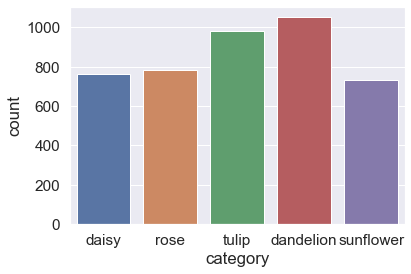

In [8]:
sns.set(font_scale=1.4)
sns.countplot(df["category"])
plt.show()

### Visualize sample data

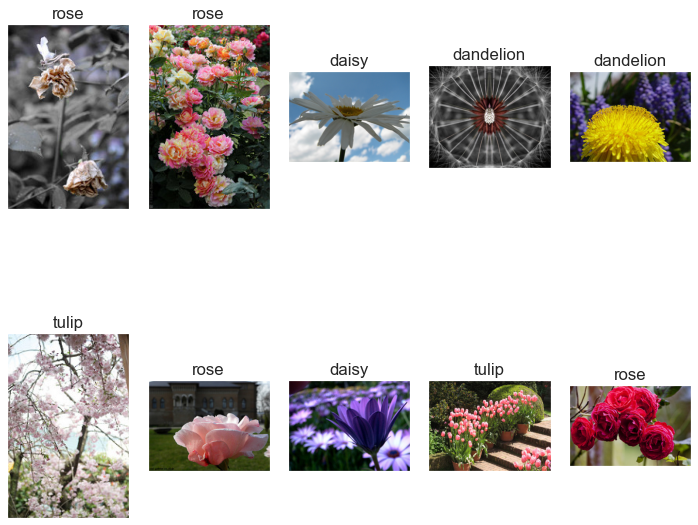

In [10]:
fig, axes = plt.subplots(nrows=2,
                         ncols=5,
                         figsize=(10, 10),
                         subplot_kw={
                             "xticks": [],
                             "yticks": []
                         })

for ax in axes.flat:
    i = random.randint(0, df.shape[0])
    ax.imshow(plt.imread(df['file_name'][i]))
    ax.set_title(df['category'][i])

plt.tight_layout()
plt.show()

### Train set, validation set, test set split

In [27]:
class_name = df['category'].unique().tolist()

data_dir = os.getcwd() + "/../flowers"
train_dir = os.getcwd() + "/../data_2/train"
val_dir = os.getcwd() + "/../data_2/valid"
test_dir = os.getcwd() + "/../data_2/test"

for label in class_name:
    img_list = df.loc[df['category'] == label]['file_name'].tolist()

    train_folder = f"{train_dir}/{label}"
    val_folder = f"{val_dir}/{label}"
    test_folder = f"{test_dir}/{label}"

    #     create folder if not exist
    if not os.path.exists(train_folder):
        os.system(f"mkdir -p {train_folder}")
    if not os.path.exists(val_folder):
        os.system(f"mkdir -p {val_folder}")
    if not os.path.exists(test_folder):
        os.system(f"mkdir -p {test_folder}")

    # train, valid, test split
    train_list, test_list = train_test_split(img_list,
                                             test_size=0.15,
                                             shuffle=True,
                                             random_state=123)
    train_list, val_list = train_test_split(train_list,
                                            test_size=0.1,
                                            shuffle=True,
                                            random_state=321)
    # copy to folder
    for train_img in train_list:
        os.system(f"cp {train_img} {train_folder}")

    for test_img in test_list:
        os.system(f"cp {test_img} {test_folder}")

    for val_img in val_list:
        os.system(f"cp {val_img} {val_folder}")

  0%|          | 0/584 [00:00<?, ?it/s]

  0%|          | 0/115 [00:00<?, ?it/s]

  0%|          | 0/65 [00:00<?, ?it/s]

  0%|          | 0/599 [00:00<?, ?it/s]

  0%|          | 0/118 [00:00<?, ?it/s]

  0%|          | 0/67 [00:00<?, ?it/s]

  0%|          | 0/752 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/804 [00:00<?, ?it/s]

  0%|          | 0/158 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/560 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/63 [00:00<?, ?it/s]